In [3]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from os import listdir
from os.path import isfile, join

mypath = './example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [4]:
import preprocessing # 전처리를 위한 preprocessing.py 파일을 임포트합니다. 
stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기
docs_nouns = [preprocessing.En_preprocessing(doc, stopwords) for doc in total_docs]

In [5]:
print(docs_nouns) #list of lists

[['aleman', 'world', 'video', 'game', 'front', 'gunshot', 'restroom', 'cover', 'mass', 'shooting', 'florida', 'time', 'tournament', 'player', 'football', 'video', 'game', 'madden', 'jacksonville', 'winner', 'level', 'tournament', 'vega', 'october', 'cash', 'prize', 'participant', 'jacksonville', 'marketplace', 'store', 'bar', 'restaurant', 'st', 'john', 'river', 'david', 'gamer', 'baltimore', 'maryland', 'jacksonville', 'tournament', 'game', 'bar', 'back', 'pizza', 'restaurant', 'sunday', 'gun', 'venue', 'fire', 'people', 'gun', 'mike', 'williams', 'police', 'motive', 'katz', 'handgun', 'sheriff', 'people', 'wound', 'people', 'area', 'williams', 'victim', 'condition', 'hospital', 'sheriff', 'horror', 'stream', 'event', 'game', 'shot', 'people', 'person', 'f', 'whatd', 'call', 'williams', 'officer', 'scene', 'minute', 'bathroom', 'minute', 'ran', 'scene', 'im', 'member', 'jacksonville', 'fire', 'station', 'rock', 'training', 'parking', 'garage', 'street', 'landing', 'dozen', 'people', '

In [6]:
docs_nouns[0]

['aleman',
 'world',
 'video',
 'game',
 'front',
 'gunshot',
 'restroom',
 'cover',
 'mass',
 'shooting',
 'florida',
 'time',
 'tournament',
 'player',
 'football',
 'video',
 'game',
 'madden',
 'jacksonville',
 'winner',
 'level',
 'tournament',
 'vega',
 'october',
 'cash',
 'prize',
 'participant',
 'jacksonville',
 'marketplace',
 'store',
 'bar',
 'restaurant',
 'st',
 'john',
 'river',
 'david',
 'gamer',
 'baltimore',
 'maryland',
 'jacksonville',
 'tournament',
 'game',
 'bar',
 'back',
 'pizza',
 'restaurant',
 'sunday',
 'gun',
 'venue',
 'fire',
 'people',
 'gun',
 'mike',
 'williams',
 'police',
 'motive',
 'katz',
 'handgun',
 'sheriff',
 'people',
 'wound',
 'people',
 'area',
 'williams',
 'victim',
 'condition',
 'hospital',
 'sheriff',
 'horror',
 'stream',
 'event',
 'game',
 'shot',
 'people',
 'person',
 'f',
 'whatd',
 'call',
 'williams',
 'officer',
 'scene',
 'minute',
 'bathroom',
 'minute',
 'ran',
 'scene',
 'im',
 'member',
 'jacksonville',
 'fire',
 'sta

In [7]:
from gensim.corpora import Dictionary

In [8]:
dictionary = Dictionary(docs_nouns)

In [9]:
DTM = []
for doc in docs_nouns:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [10]:
from gensim.models import LsiModel

In [11]:
model = LsiModel(DTM, num_topics=5, id2word=dictionary) 

각 주제들과 관련이 높은 단어들 확인하기

In [12]:
model.print_topics(num_words=10)

[(0,
  '-0.450*"trump" + -0.420*"president" + -0.255*"mccain" + -0.178*"mccains" + -0.144*"john" + -0.126*"admission" + -0.120*"week" + -0.118*"senator" + -0.116*"house" + -0.113*"trade"'),
 (1,
  '0.449*"admission" + 0.352*"student" + 0.296*"harvard" + 0.190*"college" + 0.189*"applicant" + -0.180*"trump" + 0.179*"university" + 0.167*"case" + 0.161*"race" + 0.150*"court"'),
 (2,
  '0.275*"trade" + 0.275*"economy" + 0.244*"export" + 0.242*"china" + 0.211*"september" + 0.189*"survey" + 0.186*"order" + 0.174*"growth" + 0.168*"company" + 0.164*"month"'),
 (3,
  '-0.293*"jacksonville" + -0.248*"people" + -0.231*"williams" + -0.231*"tournament" + -0.177*"game" + -0.163*"victim" + -0.147*"video" + -0.133*"area" + -0.133*"hospital" + -0.131*"landing"'),
 (4,
  '-0.368*"agreement" + -0.319*"mexico" + -0.301*"canada" + -0.281*"deal" + -0.187*"negotiation" + -0.187*"trade" + -0.166*"issue" + -0.158*"talk" + 0.156*"mccain" + -0.146*"official"')]

각 주제와 각 문서간의 관련 정도 확인해 보기 

In [14]:
model[DTM[0]] # 문서 0의 경우, 주제 3과 가장 큰 관련이 있습니다.

[(0, -5.010340723721413),
 (1, 1.9889856978513853),
 (2, 3.2091776041683833),
 (3, -17.51347297018426),
 (4, -1.7555975726161503)]

In [15]:
model[DTM[1]]

[(0, -6.396194084941487),
 (1, 1.5227026892174982),
 (2, 2.8191051872486597),
 (3, -18.82765710924198),
 (4, -1.3939499564797027)]

In [16]:
model[DTM[2]]

[(0, -5.590748151663147),
 (1, 2.9134641429111916),
 (2, 3.4727592597535613),
 (3, -19.36374646237506),
 (4, -1.3727006624945226)]

# 찾고자 하는 주제의 수 정하기

In [64]:
from gensim.models import CoherenceModel

In [65]:
start = 1
limit = 11
step = 1

In [106]:
dictionary = Dictionary(docs_nouns)
DTM = []
for doc in docs_nouns:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [107]:
coherence_values_umass = []

for num_topics in range(start, limit, step):
    lsi_model = LsiModel(DTM, num_topics=num_topics, id2word=dictionary)
    coherencemodel = CoherenceModel(model=lsi_model, corpus=DTM, dictionary=dictionary, 
                                    coherence='u_mass', topn=10)
    coherence_values_umass.append(coherencemodel.get_coherence())

In [108]:
coherence_values_umass

[-3.658681163404324,
 -2.2107483400604186,
 -3.220818535056066,
 -2.4813673350165875,
 -2.019197908680385,
 -2.2890062857472966,
 -2.881718918575518,
 -3.626452733268986,
 -2.3618895114127927,
 -2.426869325893705]

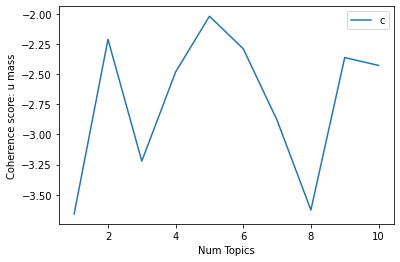

In [109]:
import matplotlib.pyplot as plt
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: u mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [124]:
dictionary = Dictionary(docs_nouns)
DTM = []
for doc in docs_nouns:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [134]:
len(dictionary)

1168

In [138]:
coherence_values_cv = []

for num_topics in range(start, limit, step):
    lsi_model = LsiModel(DTM, num_topics=num_topics, id2word=dictionary)
    coherencemodel = CoherenceModel(model=lsi_model, corpus=DTM, texts=docs_nouns, dictionary=dictionary, 
                                    coherence='c_v', topn=50)
    coherence_values_cv.append(coherencemodel.get_coherence())

In [139]:
coherence_values_cv

[0.3822013914131604,
 0.4403213078918927,
 0.47013249202742974,
 0.44727263370587933,
 0.5209518151127824,
 0.4839576991050871,
 0.4629292328263774,
 0.4204294415504313,
 0.39334614892795916,
 0.4425883222926473]

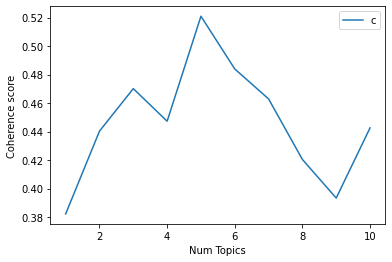

In [140]:
x = range(start, limit, step)
limit=limit; start=start; step=step;
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()